# [CPSC 222](https://github.com/GonzagaCPSC222) Intro to Data Science
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# Normal Distributions
What are our learning objectives for this lesson?
* Learn about the Z and t distributions
* Compute confidence intervals for a population mean

Content used in this lesson is based upon information in the following sources:
* Dr. Mirjeta Beqiri's Stats notes
* [Math is Fun](https://www.mathsisfun.com/data/standard-normal-distribution.html)
* [JMP Statistical Discovery](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/t-distribution.html)

## Warm-up Task(s)
1. Open StatsFun
1. Try as many parts of this practice problem as you can (it helps to draw a picture!!)

Adapted from [Khan Academy](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/stats-normal-distributions/e/empirical_rule): The lifespans of meerkats in a particular zoo are normally distributed. The average meerkat lives 13.1 years; the standard deviation is 1.5 years.
1. About 68% of the meerkats have a lifespan between what two values?
1. About 95% of the meerkats have a lifespan between what two values?
1. About 99.7% of the meerkats have a lifespan between what two values?
1. Use the empirical rule to estimate the probability of a meerkat living less than 10.1 years.
1. Use the empirical rule to estimate the probability of a meerkat living longer than 14.6 years.
1. Use the empirical rule to estimate the probability of a meerkat living between 11.6 and 16.1 years.
1. (tricky) What is the probability a meerkat lives < 15 years? > 15 years? 
    1. We need to learn about the standard normal distribution and Z-scores for this one!!

## Today
* Announcements
    * MA11 due at start of class (no MA rest of week, work on DA5)
    * DA5 is due on Thursday. Questions?
* Today
    * More StatsFun (normal distribution properties, standard normal distribution, Z-scores and Z-tables, t-distribution)

## Warm-up Task(s)
1. Pull out your notes from last class
1. In StatsFun, create a new Notebook called ConfidenceIntervals.ipynb
    1. Declare a variable to store the following values: 8.2, 9.1, 7.7, 8.6, 6.9, 11.2, 10.1, 9.9, 8.9, 9.2, 7.5, 10.5
    1. Then compute and print the values' `sample` mean and `sample` standard deviation

## Today
* Announcements
    * IQ7 TBD
    * Project information and due date timeline is posted to Google Drive folder. Please take a look at it before next class.
    * DA5 is due tonight. Questions?
    * DA6 is posted
* Today
    * StatsFun (confidence intervals and start hypothesis testing)

## Z-Distribution Kitten Practice Problem
Adapted from [stat199review](http://www.stat119review.com/more-material/normal-distribution/empirical-rule/solving-empirical-rule-questions): The weights of a population of kittens are normally distributed with a mean of 3.6 pounds and a standard deviation of 0.4 pounds. Answer the following questions, using the Empirical Rule.
1. What percent of kittens weigh between 2.8 and 4.8 pounds? 
1. What percent of kittens weigh less than 2.4 pounds?
1. What value corresponds to a 97.5th percentile of kitten weights? 
1. What percent of kittens weight less than 3.1 pounds? Hint: for this one, calculate a Z-score and use the Z-table
1. (tricky) What percent of kittens weight more than 3.1 pounds? Hint: for this one, also calculate a Z-score and use the Z-table

## Confidence Interval Practice Problems
### 1 Sales Representatives Incomes (Z-dist)
See Dr. Mirjeta Beqiri's step-by-step instructional video available [here](https://youtu.be/Z0vyrng9824)

### 2 Phone Battery Life (t-dist)
Adapted from [Khan Academy](https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-t-interval-mean/e/calculating-one-sample-t-interval-mean): Olivia works at a company that creates mobile phones. She wanted to estimate the mean amount of time their new phone's battery lasts with regular use after a full charge. She took a random sample of 6 of these phones and randomly assigned each of them to a volunteer. She instructed them to fully charge the phones and use them as they regularly would until the battery died (without recharging the phone). The data they reported is shown below (Mean: 9 hours; Standard deviation: 2.07 hours). Assume the data is normal. Compute a 90% confidence interval for the mean battery life (in hours).

Phone|1|2|3|4|5|6
-|-|-|-|-|-|-
Battery life (hours)|8.0|6.0|10.5|9.0|8.5|12.0

## The Normal (Z) Distribution
Here is a great introduction the normal (AKA Gaussian) distribution from [Math is Fun](https://www.mathsisfun.com/data/standard-normal-distribution.html):

![](https://github.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/raw/master/figures/intro_normal_distribution.png)
    
![](https://github.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/raw/master/figures/intro_empirical_rule.png)

### Data Science Application: Empirical Rule
The empirical rule for a normal (i.e., Gaussian) data distribution states that"
* About 68% of values are within 1 standard deviation of the mean
* About 95% of values are within 2 standard deviations of the mean
* About 99.7% of values are within 3 standard deviations of the mean

This property of normal distributions is important because if we assume our sample is normal (and alot of data is normal), then we can estimate how likely it is to observe a certain value.

Let's use Numpy to sample some data from a normal distribution to see the empirical rule in action!

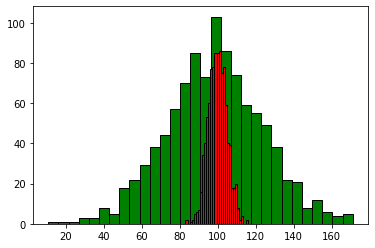

Within +/1 stdev: 68.60%
Within +/2 stdev: 96.20%
Within +/3 stdev: 99.70%


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# consistent values
mean = 100
num_samples = 1000

# large variance, large standard deviation
stdev = 25
large_stdev = np.random.normal(mean, stdev, num_samples) # mean, stdev, num_samples
plt.hist(large_stdev, bins=30, edgecolor="black", facecolor="green")

# small variance, small standard deviation
stdev = 5
small_stdev = np.random.normal(mean, stdev, num_samples) # mean, stdev, num_samples
plt.hist(small_stdev, bins=30, edgecolor="black", facecolor="red")
plt.show()

# test the empirical rule
within_1stdev = 0
within_2stdev = 0
within_3stdev = 0

for value in small_stdev:
    if mean - 1 * stdev <= value <= mean + 1 * stdev:
        within_1stdev += 1
    if mean - 2 * stdev <= value <= mean + 2 * stdev:
        within_2stdev += 1
    if mean - 3 * stdev <= value <= mean + 3 * stdev:
        within_3stdev += 1
print("Within +/1 stdev: %.2f%%" %(within_1stdev / num_samples * 100))
print("Within +/2 stdev: %.2f%%" %(within_2stdev / num_samples * 100))
print("Within +/3 stdev: %.2f%%" %(within_3stdev / num_samples * 100))

## Standard Normal Distribution
The standard normal distribution is a normal Z-distribution with mean = 0 and standard deviation = 0. The standard normal distribution is incredibly useful because we can use the empirical rule (and more exact measures of probability) with it. Here is a great intro to the standard normal distribution from [Math is Fun](https://www.mathsisfun.com/data/confidence-interval.html):

![](https://raw.githubusercontent.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/master/figures/intro_standard_normal.png)

We can convert an observation, $X$, from a normal distribution into a standard normal Z-value (AKA Z-score) using the formula Z-score = $\frac{X -\mu}{\sigma}$, where $\mu$ is the population mean and $\sigma$ is the population standard deviation. This Z-score will tell us the distance between the observed value $X$ and the mean, expressed in terms of the number of standard deviations. With this Z-score, we can determine the probability observing values less than or greater than the Z-score.

Here is an example of this adapted from [Khan Academy](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/e/z_scores_1):
>The grades on a history midterm at Almond are roughly symmetric with $\mu = 85$ and $\sigma = 2.0$. Michael scored 86 on the exam. Find the z-score for Michael's exam grade. Round to two decimal places.

Z-score = $\frac{X - \mu}{\sigma} = \frac{86 - 85}{2.0} = 0.5$ This means that Michael's score is 0.5 standard deviations away from the mean. Using a Z-table to look up probabilities for Z-scores, we could find out the probability that a student receives a score above or below 86. 

Z-table from https://sixsigmastudyguide.com/wp-content/uploads/2014/04/z-table.jpg:

![](https://sixsigmastudyguide.com/wp-content/uploads/2014/04/z-table.jpg)

Using this Z-table, we see that a Z-score of 0.5 corresponds to a probability value of 0.6915. This means that the probability of receiving a score on the exam of 86 or less is 69.15% and the probability of receiving a score greater than 86 is 100% - 69.15% = 30.85%. Do you see how with the standard normal distribution, as compared to the empirical rule, we can compute more general results based on any observation (not just observations that correspond with +/- 1, 2, or 3 standard deviations)? Things are getting interesting now!

## Confidence Intervals
Now that we are familiar with the standard normal distribution, we are ready to use it to make statistical inferences. Let's start with confidence intervals. Here is a great introduction to confidence intervals from [Math is Fun](https://www.mathsisfun.com/data/confidence-interval.html):

![](https://github.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/raw/master/figures/intro_confidence_interval.png)

![](https://github.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/raw/master/figures/calculating_confidence_interval.png)

Using this table, we see that a Z-score of 0.5 correspond to a P-value of 0.69

## The t-distribution
Here is a great introduction to the t-distribution from [JMP](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/t-distribution.html)

![](https://github.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/raw/master/figures/intro_t_distribution.png)

![](https://github.com/GonzagaCPSC222/U6-Statistically-Analyzing-Data/raw/master/figures/intro_t_distribution_graph.png)

### t-distribution Confidence Intervals
Notice how the instructions above for calculating a confidence interval for a population mean using the Z distribution? This is appropriate if you have the population standard deviation, or if you have the sample standard deviation and your sample size (n) is at least 30 observations. If you have less than 30 observations, you can use the t-distribution instead (see the section below for more on the t-distribution). Here are the confidence interval formulas for both cases:
* Population standard deviation or sample standard deviation w/30+ samples (use Z-value): $\overline{X} \pm Z \frac{s}{\sqrt{n}}$
* Population standard deviation or sample standard deviation w/30+ samples (use t-value): $\overline{X} \pm t \frac{s}{\sqrt{n}}$

To find the t-value associated with your margin of error, use the following t-table:

![](https://media.cheggcdn.com/media/cb1/s675x1024/cb100490-5be7-4807-8972-c0d984f9e9fc/php3o1s6N.png)

(image from https://media.cheggcdn.com/media/cb1/s675x1024/cb100490-5be7-4807-8972-c0d984f9e9fc/php3o1s6N.png)

To use this table, you will need to compute the degrees of freedom (df = n - 1, where n is the number of observations in the sample) and the level of confidence for the confidence interval (e.g. see the small Z-table used in the example problem above).

### Confidence Interval Example w/t-distribution
Example (from [lumenlearning.com](https://courses.lumenlearning.com/introstats1/chapter/a-single-population-mean-using-the-student-t-distribution/)): 
>You do a study of hypnotherapy to determine how effective it is in increasing the number of hours of sleep subjects get each night. You measure hours of sleep for 12 subjects with the following results. Construct a 95% confidence interval for the mean number of hours slept for the population (assumed normal) from which you took the data.
8.2, 9.1, 7.7, 8.6, 6.9, 11.2, 10.1, 9.9, 8.9, 9.2, 7.5, 10.5

First, identify your variables from the prompt and compute your t-value from the table (we want to use the t-distribution because we do not have the population mean and because we have a small sample size):

In [1]:
import numpy as np

x = [8.2, 9.1, 7.7, 8.6, 6.9, 11.2, 10.1, 9.9, 8.9, 9.2, 7.5, 10.5]
Xbar = np.mean(x)
s = np.std(x, ddof=1) # to compute sample stdev, default is population
n = len(x)
df = n - 1
print("Xbar:", Xbar, "s:", s, "n:", n, "df:", df)

Xbar: 8.983333333333333 s: 1.2904074996494381 n: 12 df: 11


Next, use the t-table to look up your t-value (df = 11, 95% confidence interval):

In [2]:
t = 2.201 # from t-distribution table (use df and 95% CI)
print("t:", t)

t: 2.201


Then, compute your margin of error (what comes after the $\pm$ term) to create your confidence interval:

In [22]:
margin_of_error = t * s / np.sqrt(n)
print("margin of error:", margin_of_error)
confidence_interval = (Xbar - margin_of_error, Xbar + margin_of_error)
print("confidence interval:", confidence_interval)

margin of error: 0.81989133757425
confidence interval: (8.163441995759083, 9.803224670907582)


This means that with 95% confidence, the population mean for this sample of data is within (8.16, 9.80). We can visualize this confidence interval with Matplotlib.

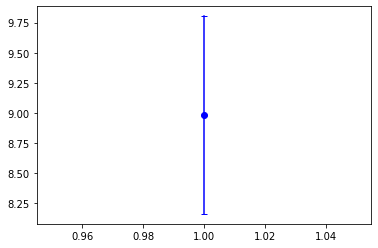

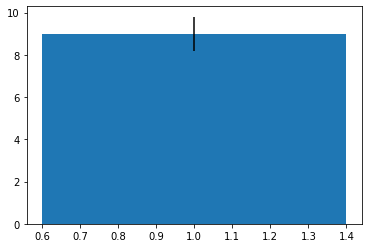

In [21]:
import matplotlib.pyplot as plt

# using a point for the mean and line for the interval
plt.plot([1, 1], confidence_interval, marker="_", color="blue")
plt.plot([1], [Xbar], marker="o", color="blue")
# or can make it horizontal by switching "Xs" and "Ys"

# using a bar for the mean and error lines for the interval
plt.figure()
plt.bar([1], [Xbar], yerr=margin_of_error)
plt.show()

Lastly, I'll note that the examples in this lesson all computed a confidence interval for a population mean. You can create confidence intervals for other parameters as well!! In this class, we are going to just scratch the surface of what can be done with normal distributions by constructing confidence intervals for the mean and conducting hypothesis testing using mean(s). That's our next topic!!